# Sentiment Analysis of IMDB Movie Reviews

Introducing my sentiment analysis project for movie reviews! With a dataset of 50,000 movie reviews, I have developed a machine learning model that classifies reviews as either positive or negative. Through extensive data preprocessing, feature extraction, and model training, this project showcases my ability to analyze textual data and provide valuable insights into the sentiment behind movie reviews.

## Data Preprocessing

In this step, we'll clean the data, handle any missing values, and convert the text into a suitable format for analysis. Here are the key tasks involved:

1. Cleaning the data: Remove any unwanted characters, symbols, or HTML tags from the text. We can use regular expressions for this task.

2. Handling missing values: Check if there are any missing values in the dataset. If there are, we can either remove the rows with missing values or input suitable values.

3. Text normalization: Convert the text to lowercase and remove punctuation marks to make things more simple.

4. Tokenization: Split the text into individual words or tokens. This step helps in creating a bag-of-words representation or applying more advanced techniques like word embeddings.

5. Stop word removal: Remove common words like "a," "the," "is," etc., as they don't contribute much to sentiment analysis.

In [1]:
# Read in the dataset with pandas
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('IMDB_Dataset.csv')

In [2]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [4]:
# Going to make this super simple and remove all punctuations and make the reviews lowercase
import re
import string

def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Make all reviews lowercase
    text = text.lower()

    return text

In [5]:
import nltk
nltk.download('punkt')  # Download the necessary resources
nltk.download('stopwords')  # Download the necessary resources
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Falur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Falur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join the filtered tokens into a single string
    processed_text = ' '.join(filtered_tokens)
    
    return processed_text

In [7]:
# Making a new column for our preprocessed text to be able to see the difference later
df['preprocessed_review'] = df['review'].apply(clean_text)
df['preprocessed_review'] = df['preprocessed_review'].apply(preprocess_text)

In [8]:
df.sample(5)

,review,sentiment,preprocessed_review
49374,I picked up this video after reading the text ...,negative,picked video reading text box story seemed goo...
39992,I approached this film with low expectations b...,positive,approached film low expectations pleasantly su...
22360,"Psycho criminal pure by Carl Schenkel, who is ...",positive,psycho criminal pure carl schenkel active holl...
48799,This was a real let down for me. The original ...,negative,real let original bride white hair great kung ...
27606,"She may have an Oscar and a Golden Globe, but ...",negative,may oscar golden globe film shows also perenni...


## Exploratory Data Analysis

Exploratory Data Analysis is a crucial step in any data science project. It helps us understand the characteristics of the dataset, identify patterns, and gain insights that can inform our modeling decisions. We can start by examining the distribution of positive and negative sentiments in the dataset to help us understand if the data is balanced or imbalanced. We can also get a word count from each review to see if there is any difference between positive and negative reviews. Lastly, I want to use the word clouds library to visualize the word frequencies associated with each sentiment.

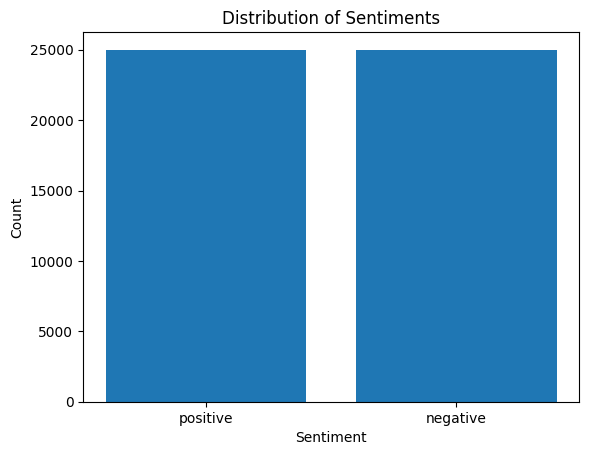

In [9]:
sentiment_counts = df['sentiment'].value_counts()

# Visualize the sentiment distribution using a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

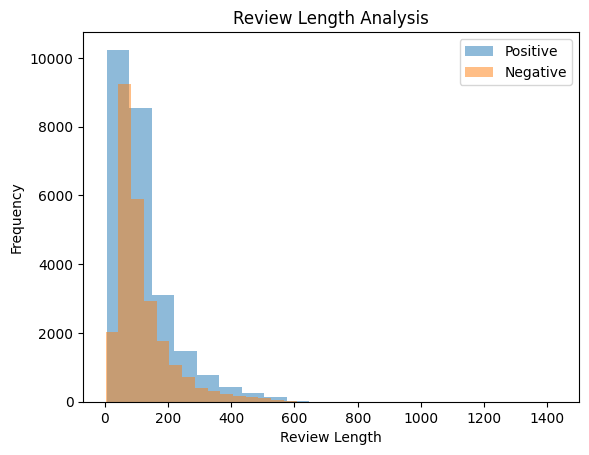

In [10]:
# Calculate the length of each review in terms of word count
df['review_length'] = df['preprocessed_review'].apply(lambda x: len(x.split()))

# Create separate dataframes for positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

# Visualize the review length distribution using histograms
plt.hist(positive_reviews['review_length'], bins=20, alpha=0.5, label='Positive')
plt.hist(negative_reviews['review_length'], bins=20, alpha=0.5, label='Negative')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Review Length Analysis')
plt.legend()
plt.show()

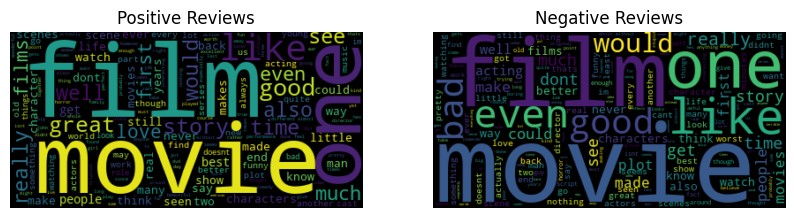

In [15]:
from wordcloud import WordCloud
from collections import Counter

# Create separate lists of words for positive and negative reviews
positive_words = [word for review in positive_reviews['preprocessed_review'] for word in review.split()]
negative_words = [word for review in negative_reviews['preprocessed_review'] for word in review.split()]

# Calculate word frequencies for positive and negative reviews
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud().generate_from_frequencies(positive_word_freq)
negative_wordcloud = WordCloud().generate_from_frequencies(negative_word_freq)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()

## Feature Engineering

Now we can transform the preprocessed reviews into numerical features that machine learning models can understand. Feature engineerings helps capture the relevant information from the text and represents it in a meaningful way. I'm going to use the bag-of-words model since it's a popular and simple technique. It's called bag-of-words because it treats a document as an unordered collection or bag of words, disregarding grammar and word order but considering word frequency.
1. Tokenization: The first step is to break down the text into individual words or tokens. This is typically done by splitting the text based on spaces or punctuation marks.
2. Vocabulary Creation: Next, a vocabulary is created by listing all unique words or tokens from the entire corpus of documents. Each word in the vocabulary represents a dimension in the resulting representation.
3. Vectorization: To represent a document in the BoW model, a vector is created. The vector has the same length as the vocabulary, with each dimension representing a word from the vocabulary. The value in each dimension indicates the frequency of the corresponding word in the document.
4. Frequency Counting: For each document, the occurrence of each word from the vocabulary is counted, and the counts are stored in the corresponding dimensions of the document's vector.
5. Sparse Representation: Since most documents contain only a subset of the words from the vocabulary, the resulting vectors are often sparse (i.e., most dimensions are zero). This is because each document is represented as a point in a high-dimensional space, with non-zero values indicating the presence of words in the document.
6. Document Comparison: Once the documents are represented as vectors, various methods can be applied to compare or analyze them. Common approaches include cosine similarity, Euclidean distance, or applying machine learning algorithms.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the reviews
X = vectorizer.fit_transform(df['preprocessed_review'])

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print the shape of the matrix
print('Shape of feature matrix:', X.shape)

Shape of feature matrix: (50000, 221392)


The shape of the matrix tells us we have 50,000 movie reviews in the dataset, and the bag-of-words representation extracted 221,392 unique words from those reviews.

## Model Selection and Training

Logistic regression is a simple and interpretable linear model that works well for binary classification tasks like sentiment analysis. It can handle high-dimensional data efficiently and provides probabilistic outputs.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the sentiment labels for the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

Accuracy: 0.8874
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.88      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



The results look promising with an accuracy of 0.8874.

## Next Steps

- Perform cross-validation or try different train-test splits to ensure the generalizability of the model's performance.
- Explore more complex models.
- Clean the reviews text more thoroughly. (expand contractions e.g. don't -> do not)

Overall, the logistic regression model performs well with high accuracy and balanced precision, recall, and F1-score for both sentiment classes. It shows that the model can effectively classify movie reviews into positive and negative sentiments.